<a href="https://colab.research.google.com/github/Mouloud007/FifaCup/blob/main/CNNTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix # Import confusion_matrix

import os

In [21]:
# Load CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) =  fashion_mnist.load_data()

In [22]:
# Normalize the data (scaling pixel values to the range [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0


In [23]:
# Print shapes to confirm the dataset's structure
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [51]:
# Model definition
model = Sequential()

# Convolutional Blocks
# Updated input_shape to (28, 28, 1) to match Fashion-MNIST data
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# ... (rest of your model definition) ...

# Compile the model
# This line was moved before defining the rest of the model layers
# model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Second Convolutional Block
model.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))



# Second Convolutional Block - this block was likely redundant and has been removed
# model.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
model.add(Dropout(0.2))


# Third Convolutional Block
model.add(Conv2D(128, kernel_size=1, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))) #Changed kernel size to 1 to avoid negative dimension errors
model.add(BatchNormalization())


# Flatten the feature maps to a vector
model.add(Flatten())

# Dropout to reduce overfitting

# Dense Layer for Classification
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))

# Compile the model - Moved to the end after defining all layers and call the compile method with arguments
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# prompt: train the model

# Assuming your data is in X_train, y_train, X_test, y_test
# Adjust the epochs and batch_size based on your computational resources and desired training time
history =model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 270s 281ms/step - accuracy: 0.7713 - loss: 1.4406 - val_accuracy: 0.8599 - val_loss: 0.9528
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 264s 281ms/step - accuracy: 0.8763 - loss: 0.8456 - val_accuracy: 0.8808 - val_loss: 0.6968
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 257s 274ms/step - accuracy: 0.8947 - loss: 0.6134 - val_accuracy: 0.8756 - val_loss: 0.5818
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 266s 278ms/step - accuracy: 0.9008 - loss: 0.5070 - val_accuracy: 0.8983 - val_loss: 0.4797
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 257s 274ms/step - accuracy: 0.9060 - loss: 0.4529 - val_accuracy: 0.9049 - val_loss: 0.4445
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 257s 268ms/step - accuracy: 0.9118 - loss: 0.4191 - val_accuracy: 0.8931 - val_loss: 0.4566
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 273s 280ms/step - accuracy: 0.9162 - loss: 0.3979 - val_accuracy: 0.8978 - val_loss: 0.4608
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 315s 273ms/step - accuracy: 0.9142 -

In [53]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9037


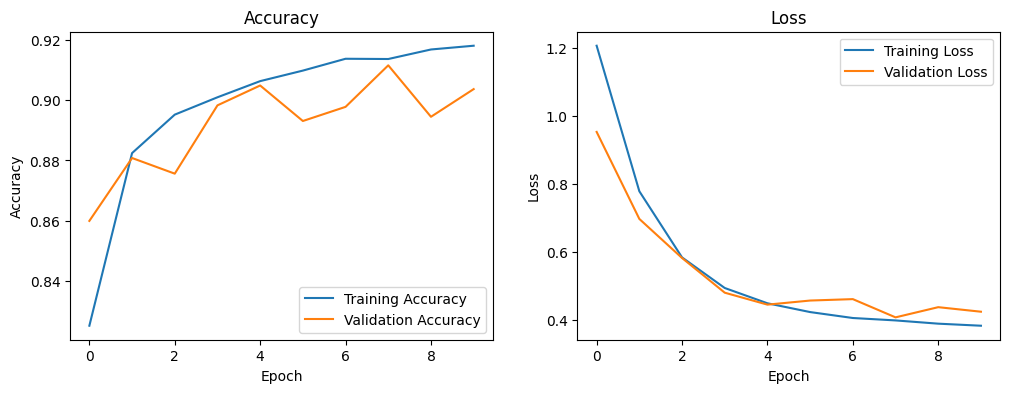

In [54]:
# prompt: generate for me the code to see the graphs for accuracy and loss
import matplotlib.pyplot as plt

# Plot the accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


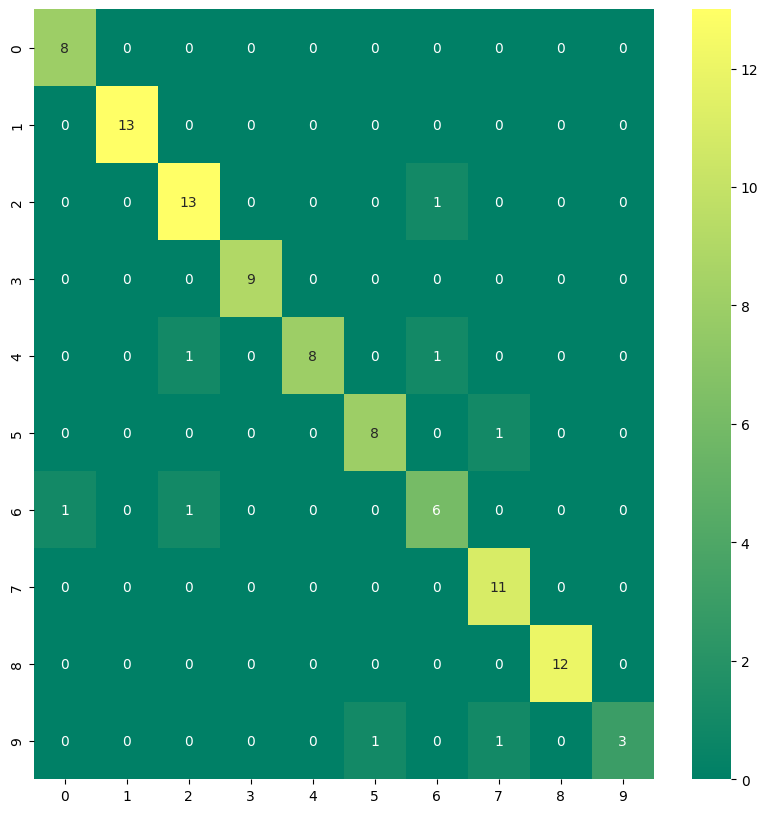

In [59]:
predictions=model.predict(X_test[1:100])
predictions=np.argmax(predictions,axis=1)
plt.figure(figsize=(10,10))
cm=confusion_matrix(y_test[1:100],predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap='summer', fmt='g', ax=ax);

In [60]:
# Save the Final Model
final_model_path = "final_model.h5"
model.save(final_model_path)
print(f"Model saved to {final_model_path}")

Model saved to final_model.h5


In [61]:
# Save the Final Model
final_model_path = "final_model.h5"
model.save(final_model_path)
print(f"Model saved to {final_model_path}")

Model saved to final_model.h5
